# 1. frame the problem 
We want to see if we can detect whether or not people have had strokes based on related lifestyle info 
<br>

<b> COLUMN INFO: 
1) id: unique identifier <br>
2) gender: "Male", "Female" or "Other" <br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>
<br>
Note: "Unknown" in smoking_status means that the information is unavailable for this patient



# 2. get the data 
- standard libraries
- in 'datasets' folder 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = './datasets/stroke_data.csv'
stroke = pd.read_csv(path)
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
stroke.describe()

# data is mostly not missing 
# stroke, hypertension, and heart_disease have pretty low means -- imbalance 
# see a minimum age of 0.08 -- could need some outlier deletion 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [3]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# we can go ahead and split the data into training and testing now 
from sklearn.model_selection import train_test_split

# 20% of the whole set will be enough 
Xtrain, Xtest = train_test_split(stroke, test_size=0.2)
stroke_labels = Xtrain['stroke'].copy()
ytest = Xtest['stroke'].copy()

print("training set size: ", Xtrain.shape)
print("training label size: ", stroke_labels.shape)
print("\ntest set size: ", Xtest.shape)
print("test label size: ", ytest.shape)

training set size:  (4088, 12)
training label size:  (4088,)

test set size:  (1022, 12)
test label size:  (1022,)


# 3. explore the data 
- create a fresh dataset from the training set 
- study the characteristics of the features 
- look at correlations 
- try some feature engineering 
- explore missing values 
- explore outliers 
- create visualizations 

In [5]:
stroke = Xtrain.copy()

In [6]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4935,47691,Male,16.0,0,0,No,Private,Rural,97.23,30.6,never smoked,0
2428,6480,Male,62.0,0,0,No,Govt_job,Urban,93.55,31.7,never smoked,0
2006,6493,Male,31.0,0,0,No,Private,Urban,97.78,22.6,smokes,0
1389,68235,Male,12.0,0,0,No,children,Rural,86.00,20.1,formerly smoked,0
75,66159,Female,80.0,0,1,Yes,Self-employed,Rural,66.72,21.7,formerly smoked,1


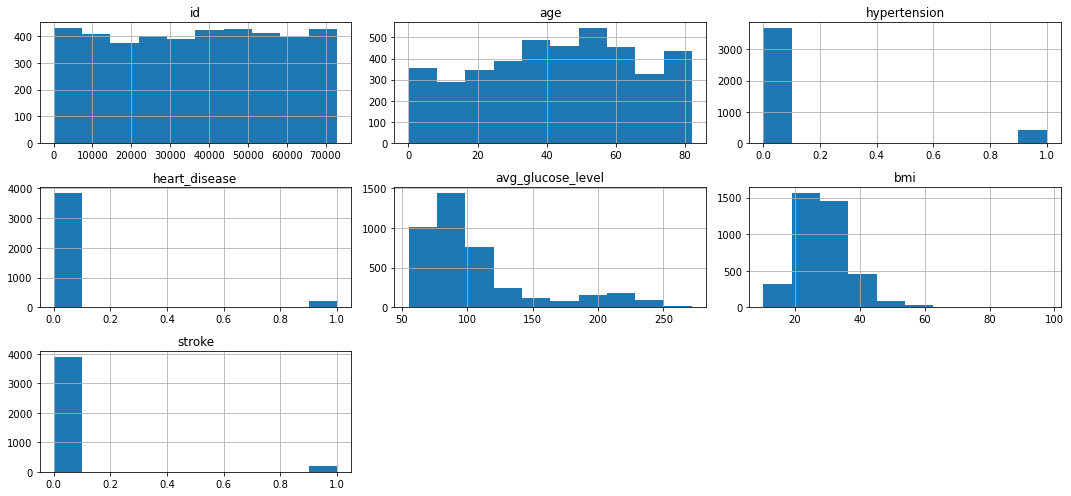

In [7]:
# lets look at distributions in total 
stroke.hist(bins= 10, figsize=(15,7))
plt.tight_layout()
plt.show()

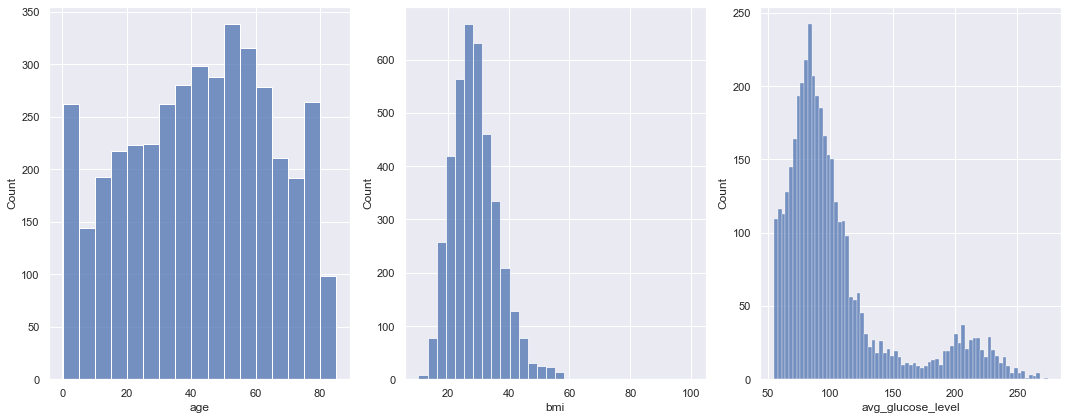

In [8]:
sns.set_theme()
plt.figure(figsize=(15, 6))

# age distribution 
plt.subplot(131)
sns.histplot(x=stroke['age'], binwidth=5)

# bmi
plt.subplot(132)
sns.histplot(x=stroke['bmi'], binwidth=3, bins = 40)

# glucose
plt.subplot(133)
sns.histplot(x=stroke['avg_glucose_level'], binwidth=3, bins = 30)

plt.tight_layout()
plt.show()

In [9]:
# we can drop id column
stroke.drop("id", inplace=True, axis=1)

In [10]:
# correlation matrix 
corr_matrix = stroke.corr()

print("Stroke Correlations:\n",corr_matrix["stroke"].sort_values(ascending=False)) 
print("")
print("Heart Disease Correlation:\n", corr_matrix['heart_disease'].sort_values(ascending=False))

Stroke Correlations:
 stroke               1.000000
age                  0.243734
heart_disease        0.141021
hypertension         0.132163
avg_glucose_level    0.127772
bmi                  0.044071
Name: stroke, dtype: float64

Heart Disease Correlation:
 heart_disease        1.000000
age                  0.269409
avg_glucose_level    0.150615
stroke               0.141021
hypertension         0.110574
bmi                  0.041671
Name: heart_disease, dtype: float64


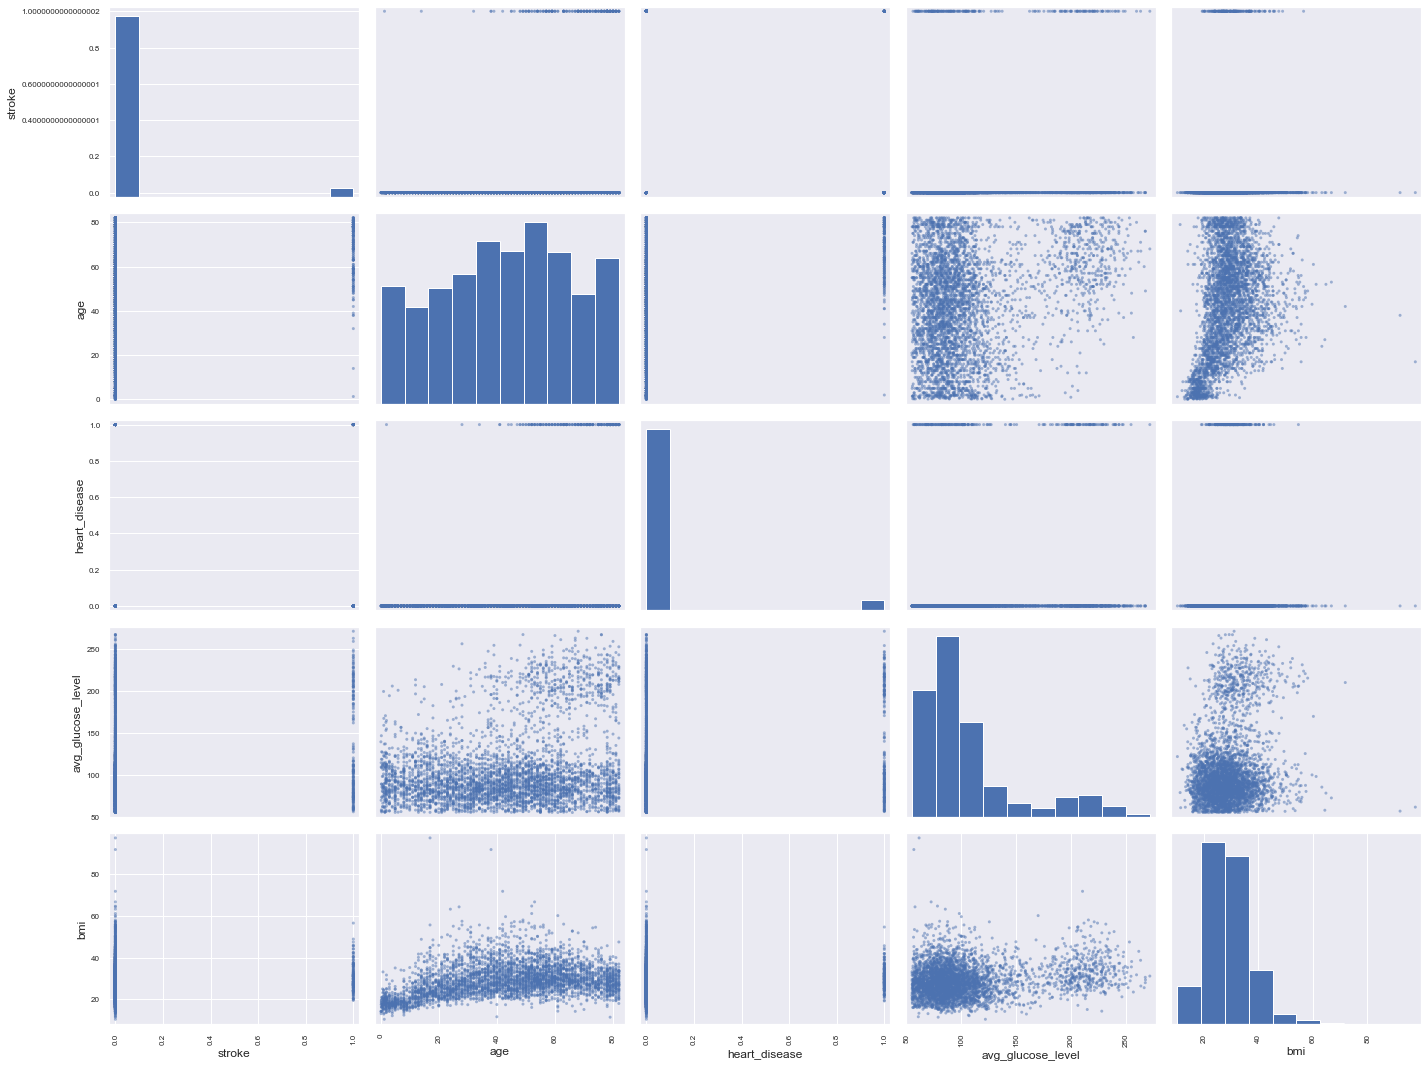

In [11]:
# visualize the correlations 
from pandas.plotting import scatter_matrix

# attributes 
attributes = ['stroke', 'age', 'heart_disease', 'avg_glucose_level', 'bmi']

# plot
scatter_matrix(stroke[attributes], figsize=(20,15))
plt.tight_layout()
plt.show()

### insights: 
 - somewhat strong:  
    - bmi and glucose levels <br>
    - age and bmi 

<Figure size 1080x720 with 0 Axes>

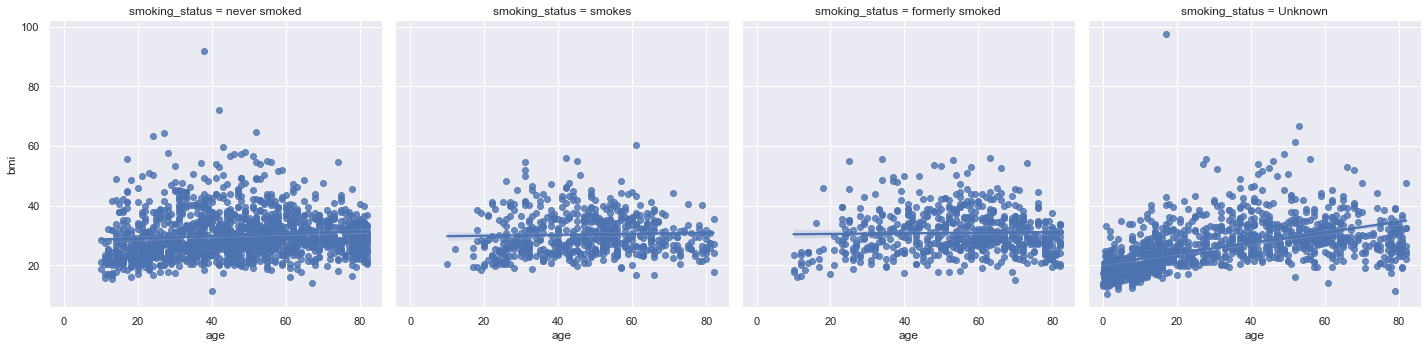

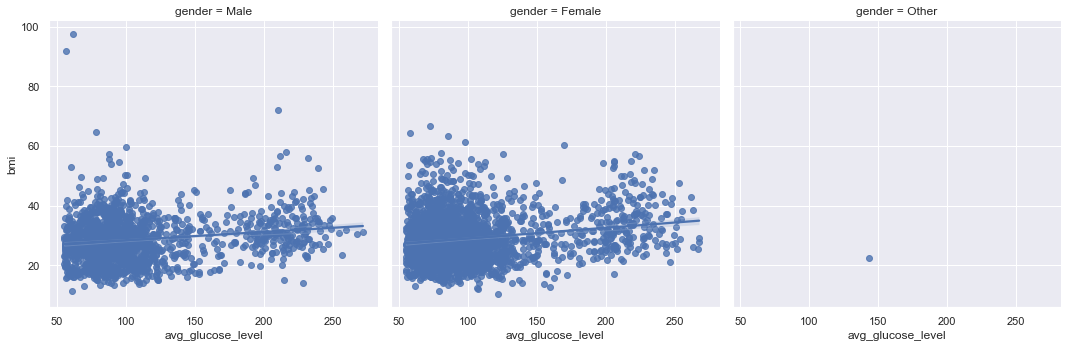

In [12]:
plt.figure(figsize=(15,10))

# zoom into age vs bmi 
# plt.subplot(121)
sns.lmplot(data = stroke, x='age', y= 'bmi', col='smoking_status')
plt.show()

# # zoom into glucose and bmi 
# plt.subplot(122)
sns.lmplot(x='avg_glucose_level', y= 'bmi', data=stroke, col = 'gender')

# 4. data prep
- get clean data 
- clean up outliers 
- scale numerical data 
- impute missing data 
- encode categorical data 

In [13]:
stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [14]:
stroke['smoking_status'].value_counts()

never smoked       1526
Unknown            1243
formerly smoked     694
smokes              625
Name: smoking_status, dtype: int64

In [15]:
stroke.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  154
smoking_status         0
stroke                 0
dtype: int64

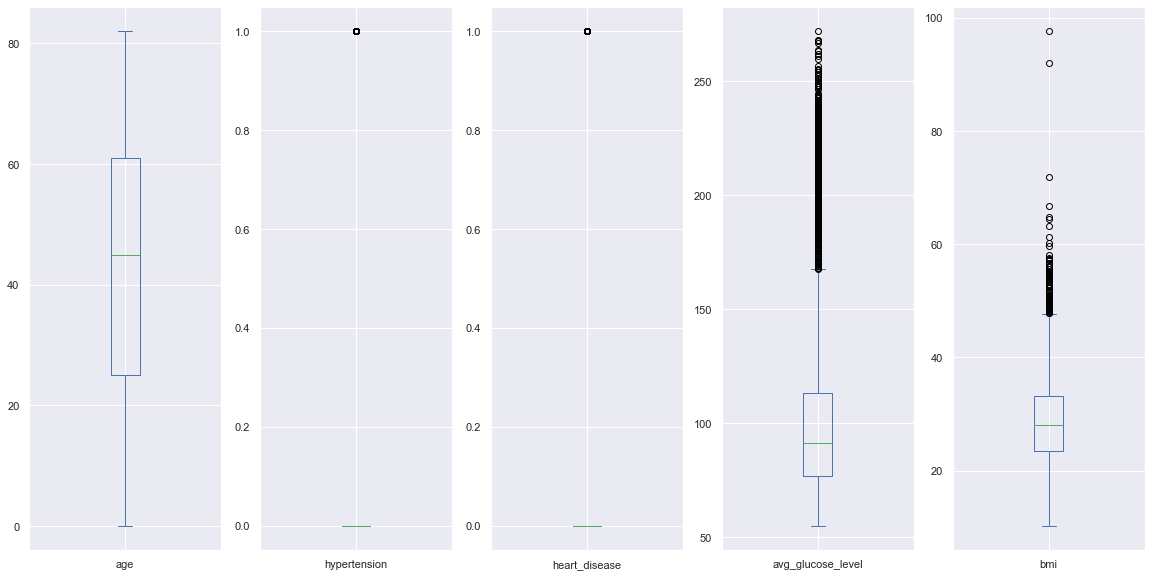

In [16]:
# explore the outliers 
outlier_detect = stroke.drop("stroke", 1, inplace = False)

outlier_detect.plot(kind = 'box', subplots = True, figsize= (20,10))
plt.show()

In [17]:
# resolve outliers
from scipy import stats

def outliers_high(feat):
    q1= feat.quantile(.25)
    q2= feat.quantile(.5)
    q3= feat.quantile(.75)
    
    # where feat is greater than q3 + the iqr, return the value of q2... otherwise keep feat the same 
    feat = np.where(feat > q3+ stats.iqr(feat),q2,feat)
    return feat

def outliers_low(feat):
    q1= feat.quantile(.25)
    q2= feat.quantile(.5)
    q3= feat.quantile(.75)
    # where feat is < the iqr - q1 return the value of q2,... otherwise keep feat the same 
    feat = np.where(feat < q1 - stats.iqr(feat),q2,feat)
    return feat

# go through all of the numerical columns and eval for outliers
num_cols = ['avg_glucose_level', 'bmi', 'age']
for columns in num_cols:
    stroke[columns] = outliers_high(stroke[columns])
    stroke[columns] = outliers_low(stroke[columns])

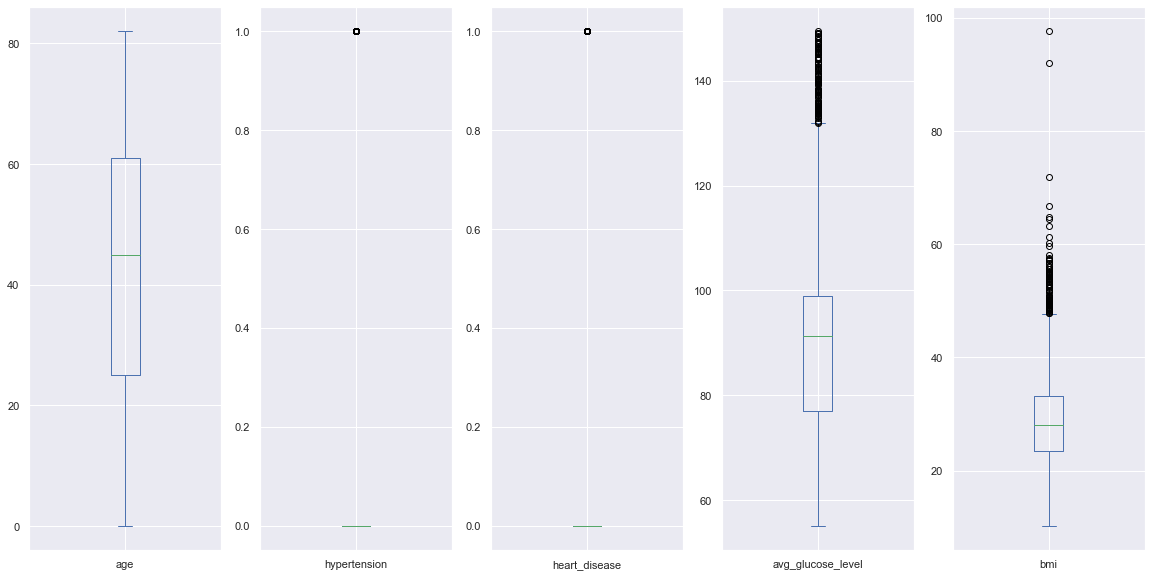

In [18]:
outlier_detect = stroke.drop("stroke", 1, inplace = False)

outlier_detect.plot(kind = 'box', subplots = True, figsize= (20,10))
plt.show()

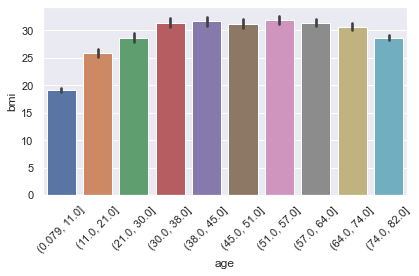

In [19]:

age_group = pd.qcut(stroke['age'], 10)
sns.barplot(x=age_group, y='bmi', data=stroke)
plt.xticks(rotation =45)
plt.tight_layout()

In [20]:
# find the average bmi per age group 
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4935,Male,16.0,0,0,No,Private,Rural,97.23,30.6,never smoked,0
2428,Male,62.0,0,0,No,Govt_job,Urban,93.55,31.7,never smoked,0
2006,Male,31.0,0,0,No,Private,Urban,97.78,22.6,smokes,0
1389,Male,12.0,0,0,No,children,Rural,86.00,20.1,formerly smoked,0
75,Female,80.0,0,1,Yes,Self-employed,Rural,66.72,21.7,formerly smoked,1


In [21]:
# refresh data 
stroke = Xtrain

# go through all of the numerical columns and eval for outliers
num_cols = ['avg_glucose_level', 'bmi', 'age']
for columns in num_cols:
    stroke[columns] = outliers_high(stroke[columns])
    stroke[columns] = outliers_low(stroke[columns])
    
# drop target column from data 
# store labels 
stroke_labels = stroke['stroke'].copy()
stroke.drop(['stroke', 'id'], inplace=True, axis=1)

In [22]:
stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [23]:
# preprocessing libraries 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# numerical sub dataset
numericals = stroke.drop(['gender', 'ever_married', 'smoking_status', 'work_type', 'Residence_type'], 1, inplace=False)

# numerical pipeline for imputing and scaling 
num_attributes = list(numericals)
num_attributes

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('mm_scaler', MinMaxScaler()),
])

# stroke_num = num_pipeline.fit_transform(numericals)
categoricals = stroke.drop(num_attributes, axis=1, inplace=False)
cat_attributes = list(categoricals)

# full pipeline 
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', OneHotEncoder(), cat_attributes),
])

stroke_prepared = full_pipeline.fit_transform(stroke)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [25]:
# establish all the classifiers 
naive_bayes = GaussianNB()
kn = KNeighborsClassifier()
svc = SVC()
log_reg = LogisticRegression()
dtree = DecisionTreeClassifier()
rforest = RandomForestClassifier()

classifiers = [['Naive Bayes :', naive_bayes],
               ['KNeighbours :', kn],
               ['SVM :', svc],
               ['LogisticRegression :', log_reg],
               ['DecisionTree :',dtree],
               ['RandomForest :',rforest]]

# this is not adjusted for imbalance at all 
for name,classifier in classifiers:
    clf=classifier.fit(stroke_prepared,stroke_labels)
    y_pred=classifier.predict(stroke_prepared)
    print(f' \n {name} \n')
    print(f'Classification report  \n {classification_report(stroke_labels,y_pred)}' )
    print(f'Confusion matrix  \n {confusion_matrix(stroke_labels,y_pred)}' )
    print(f'ROC AUC  : {roc_auc_score(stroke_labels,y_pred)}')

 
 Naive Bayes : 

Classification report  
               precision    recall  f1-score   support

           0       1.00      0.16      0.28      3891
           1       0.06      0.99      0.11       197

    accuracy                           0.20      4088
   macro avg       0.53      0.57      0.19      4088
weighted avg       0.95      0.20      0.27      4088

Confusion matrix  
 [[ 622 3269]
 [   2  195]]
ROC AUC  : 0.5748518969325281
 
 KNeighbours : 

Classification report  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3891
           1       0.67      0.09      0.16       197

    accuracy                           0.95      4088
   macro avg       0.81      0.54      0.57      4088
weighted avg       0.94      0.95      0.94      4088

Confusion matrix  
 [[3882    9]
 [ 179   18]]
ROC AUC  : 0.5445287641531218
 
 SVM : 

Classification report  
               precision    recall  f1-score   support

           0 

- decision tree and random forest overfit, we can do grid searches to reduce overfitting 
    - this is probabaly because we standardized everything 
- NB and Kneighbors did pretty poorly according to the roc auc score 

In [26]:
# lets grid search our decision tree first 
from sklearn.model_selection import GridSearchCV

# create a parameter grid to pass into the grid search 
tree_params  = [
    {'max_depth' : [3, 6, 7, 8], 'max_features' : [13, 14, 15, 17, 19, 20, "auto", "sqrt"]}, 
]

# pass in grid
scoring_list = ['f1', 'accuracy', 'roc_auc']

# when you have a list of scaring metrics, refit needs to be set to one of them in order to access best_***
tree_grid = GridSearchCV(dtree, tree_params, cv=5, scoring=scoring_list, refit='f1', return_train_score=True)

# fit the tree grid
tree_grid.fit(stroke_prepared, stroke_labels)

# now lets look closer and examine the feature importances of the best estimator 
best_tree = tree_grid.best_estimator_

print(tree_grid.best_params_)

{'max_depth': 8, 'max_features': 17}


In [27]:
# now evaluate the predictions made by our best estimator 
tree_pred = best_tree.predict(stroke_prepared)

print("Classificiation Report: \n", classification_report(stroke_labels, tree_pred))
print("Confusion Matrix: \n", confusion_matrix(stroke_labels, tree_pred))

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3891
           1       0.92      0.29      0.44       197

    accuracy                           0.96      4088
   macro avg       0.94      0.64      0.71      4088
weighted avg       0.96      0.96      0.96      4088

Confusion Matrix: 
 [[3886    5]
 [ 140   57]]


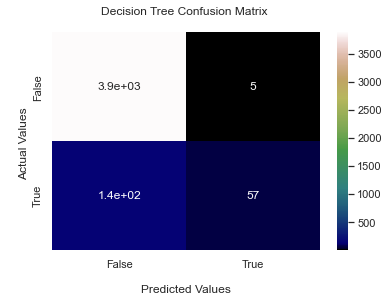

In [28]:
# lets visualize our confusion matrix 
tree_cm = confusion_matrix(stroke_labels, tree_pred)
tree_map = sns.heatmap(tree_cm, cmap='gist_earth', annot=True)

# set axis in alph order 
tree_map.set_title('Decision Tree Confusion Matrix \n');
tree_map.set_xlabel('\nPredicted Values')
tree_map.set_ylabel('\nActual Values ');

# Ticket labels - List must be in alphabetical order
tree_map.xaxis.set_ticklabels(['False','True'])
tree_map.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

In [29]:
# lets look at feature importances for the tree 
tree_fi = best_tree.feature_importances_

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_)
attributes = num_attributes + cat_attributes

sorted(zip(tree_fi, attributes), reverse=True)

[(0.3737874131788344, 'age'),
 (0.20697377934065378, 'bmi'),
 (0.19551080099234744, 'avg_glucose_level'),
 (0.03135736450004085, 'hypertension'),
 (0.02432251405606321, 'smoking_status'),
 (0.018041642758572802, 'heart_disease'),
 (0.006397606232569493, 'ever_married'),
 (0.0004950150469589697, 'gender'),
 (0.0, 'work_type'),
 (0.0, 'Residence_type')]

### insights: 
- overall the tuned tree works very well 
- we could drop some of the more irrelevant features and see what happens 

In [30]:
# lets tune the random forest next 
import numpy as np

# create param grid 
forest_params = [
    {'n_estimators' : np.linspace(start=10, stop=100, num=10, dtype=int), 
     'max_depth' : np.linspace(start=4, stop=10, endpoint=False, num=6, dtype=int),
     'max_features' : np.linspace(start=8, stop=21, num=10, dtype='int')}
]

# pass params into grid search for forest

forest_grid = GridSearchCV(rforest,
                          forest_params, 
                          scoring= scoring_list,
                          refit='f1',
                          cv= 5, 
                          return_train_score=True)
# fit the grid 
forest_grid.fit(stroke_prepared, stroke_labels)

# get the best model
best_forest = forest_grid.best_estimator_

In [31]:
# now print the classification report 
forest_pred = best_forest.predict(stroke_prepared)

print("Classification Report: \n", classification_report(stroke_labels, forest_pred))


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3891
           1       0.97      0.16      0.28       197

    accuracy                           0.96      4088
   macro avg       0.96      0.58      0.63      4088
weighted avg       0.96      0.96      0.95      4088



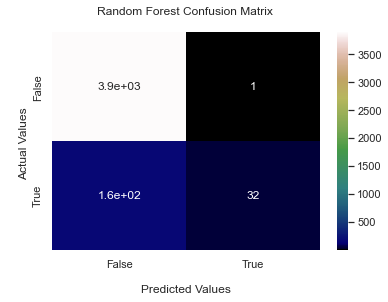

In [32]:
# lets visualize our confusion matrix 
forest_cm = confusion_matrix(stroke_labels, forest_pred)
forest_map = sns.heatmap(forest_cm, cmap='gist_earth', annot=True)

# set axis in alph order 
forest_map.set_title('Random Forest Confusion Matrix \n');
forest_map.set_xlabel('\nPredicted Values')
forest_map.set_ylabel('\nActual Values ');

# Ticket labels - List must be in alphabetical order
forest_map.xaxis.set_ticklabels(['False','True'])
forest_map.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

In [33]:
# lets look at feature importances for the tree 
forest_fi = best_tree.feature_importances_

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_)
attributes = num_attributes + cat_attributes

sorted(zip(forest_fi, attributes), reverse=True)

[(0.3737874131788344, 'age'),
 (0.20697377934065378, 'bmi'),
 (0.19551080099234744, 'avg_glucose_level'),
 (0.03135736450004085, 'hypertension'),
 (0.02432251405606321, 'smoking_status'),
 (0.018041642758572802, 'heart_disease'),
 (0.006397606232569493, 'ever_married'),
 (0.0004950150469589697, 'gender'),
 (0.0, 'work_type'),
 (0.0, 'Residence_type')]

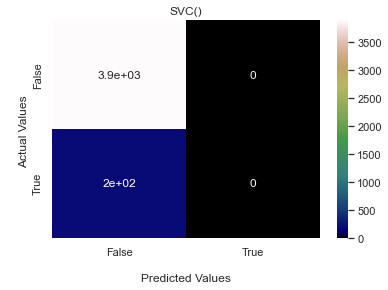

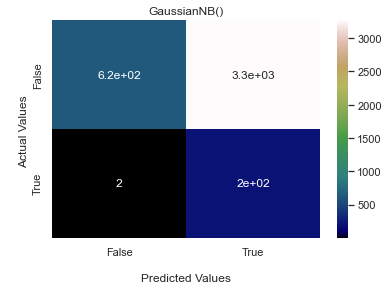

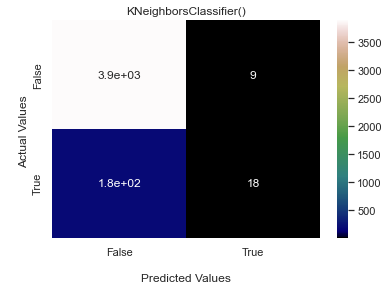

In [34]:
# lets visualize the other models confusio matrices 
models = [svc, naive_bayes, kn]

# plot the three confusion matrices 
for clf in models:
    prediction = clf.predict(stroke_prepared)
    # lets visualize our confusion matrix 
    con_matx = confusion_matrix(stroke_labels, prediction)
    clf_map = sns.heatmap(con_matx, cmap='gist_earth', annot=True)

    # set axis in alph order 
    clf_map.set_title(clf);
    clf_map.set_xlabel('\nPredicted Values')
    clf_map.set_ylabel('\nActual Values ');

    # Ticket labels - List must be in alphabetical order
    clf_map.xaxis.set_ticklabels(['False','True'])
    clf_map.yaxis.set_ticklabels(['False','True'])

    # Display the visualization of the Confusion Matrix.
    plt.show()


### insights: 
- we can continue and tune Kn and SVC
- naive bayes is a lost cause at this point 
    - we have stronger models to work with 

In [35]:
# tune kn 

# param grid 
kn_params = [
    {'n_neighbors' : np.linspace(start=2, stop=6, dtype=int), 'weights' : ['uniform'], 
     'algorithm' : ['ball_tree'] , 'leaf_size' : [ 20, 25, 30, 35]},
    {'n_neighbors' : np.linspace(start=2, stop=8, dtype=int), 'weights' : ['uniform'], 
     'algorithm' : ['kd_tree'] , 'leaf_size' : [ 20, 25, 30, 35]}, 
    {'n_neighbors' : np.linspace(start=2, stop=8, dtype=int), 'weights' : ['uniform'], 
     'algorithm' : ['auto'] , 'leaf_size' :[ 20, 25, 30, 35]}, 
    
]

# pass params into the gridsearch 

kn_grid = GridSearchCV(kn, 
                       kn_params,
                       cv=5, 
                       scoring = scoring_list,
                       refit = 'f1'
                       
)

# fit
kn_grid.fit(stroke_prepared, stroke_labels)

# find the best 
best_kn = kn_grid.best_estimator_

# kn_prediction 
kn_pred = best_kn.predict(stroke_prepared)

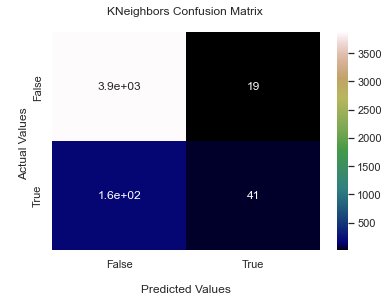

In [36]:
# lets visualize our confusion matrix 
kn_cm = confusion_matrix(stroke_labels, kn_pred)
kn_map = sns.heatmap(kn_cm, cmap='gist_earth', annot=True)

# set axis in alph order 
kn_map.set_title('KNeighbors Confusion Matrix \n');
kn_map.set_xlabel('\nPredicted Values')
kn_map.set_ylabel('\nActual Values ');

# Ticket labels - List must be in alphabetical order
kn_map.xaxis.set_ticklabels(['False','True'])
kn_map.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

In [37]:
scoring_list

['f1', 'accuracy', 'roc_auc']

In [38]:
# tune svc 
svc_params = [
    {'C' : [0.3, 0.6, 1.0, 1.2, 1.3, 1.5], 'kernel' : ['sigmoid', 'linear', 'rbf'], 'gamma' : ['scale']}
]

svc_grid = GridSearchCV(svc,
                        svc_params,
                        cv=5, 
                        scoring = scoring_list,
                        refit= 'f1')
svc_grid.fit(stroke_prepared, stroke_labels)

best_svc = svc_grid.best_estimator_

In [39]:
svc_pred = best_svc.predict(stroke_prepared)

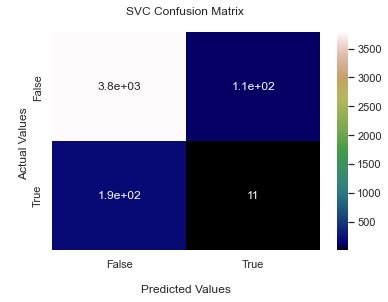

In [40]:
# lets visualize our confusion matrix 
svc_cm = confusion_matrix(stroke_labels, svc_pred)
svc_map = sns.heatmap(svc_cm, cmap='gist_earth', annot=True)

# set axis in alph order 
svc_map.set_title('SVC Confusion Matrix \n');
svc_map.set_xlabel('\nPredicted Values')
svc_map.set_ylabel('\nActual Values ');

# Ticket labels - List must be in alphabetical order
svc_map.xaxis.set_ticklabels(['False','True'])
svc_map.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

In [41]:
# get info for all of the best models to find absolute best one 
best_models = [['Forest: ' ,best_forest],
              ['Kneighbors:', best_kn],
              ['SVC: ',  best_svc],
              ['Decision Tree: ', best_tree] ]

# this is not adjusted for imbalance at all 
for name,classifier in best_models:
    clf=classifier.fit(stroke_prepared,stroke_labels)
    y_pred=classifier.predict(stroke_prepared)
    print(f' \n {name} \n')
    print(f'Classification report  \n {classification_report(stroke_labels,y_pred)}' )
    print(f'Confusion matrix  \n {confusion_matrix(stroke_labels,y_pred)}' )
    print(f'ROC AUC  : {roc_auc_score(stroke_labels,y_pred)}')


 
 Forest:  

Classification report  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3891
           1       1.00      0.21      0.34       197

    accuracy                           0.96      4088
   macro avg       0.98      0.60      0.66      4088
weighted avg       0.96      0.96      0.95      4088

Confusion matrix  
 [[3891    0]
 [ 156   41]]
ROC AUC  : 0.6040609137055838
 
 Kneighbors: 

Classification report  
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3891
           1       0.68      0.21      0.32       197

    accuracy                           0.96      4088
   macro avg       0.82      0.60      0.65      4088
weighted avg       0.95      0.96      0.95      4088

Confusion matrix  
 [[3872   19]
 [ 156   41]]
ROC AUC  : 0.6016193819656711
 
 SVC:  

Classification report  
               precision    recall  f1-score   support

           0       0

### kneighbors and decision tree have the highest accuracy
### we can use these on the testinf dataset 

In [42]:
stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [43]:
# stroke.drop(['Residence_type', 'work_type'], axis=1, inplace=True)
full_pipeline.fit_transform(stroke)

array([[0.19433594, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.75585938, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.37744141, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.65820312, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.78027344, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [44]:
#drop the row that has 'other' as a datapoint and then refit
stroke[stroke['gender'].str.contains('other')==False]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4935,Male,16.0,0,0,No,Private,Rural,97.230,30.6,never smoked
2428,Male,62.0,0,0,No,Govt_job,Urban,93.550,31.7,never smoked
2006,Male,31.0,0,0,No,Private,Urban,97.780,22.6,smokes
1389,Male,12.0,0,0,No,children,Rural,86.000,20.1,formerly smoked
75,Female,80.0,0,1,Yes,Self-employed,Rural,66.720,21.7,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
911,Female,69.0,0,0,Yes,Private,Rural,87.270,23.3,smokes
4952,Male,51.0,1,0,Yes,Self-employed,Rural,91.355,56.6,never smoked
1677,Female,54.0,0,0,Yes,Private,Urban,75.090,38.9,formerly smoked
1951,Female,82.0,0,0,Yes,Private,Urban,99.680,22.2,Unknown


In [45]:
# refit the training data 

# drop irrelevant columns and then refit the pipeline 
stroke.drop(['Residence_type', 'work_type'], inplace=True, axis=1)

# numerical sub dataset
numericals = stroke.drop(['gender', 'ever_married', 'smoking_status'], 1, inplace=False)

# numerical pipeline for imputing and scaling 
num_attributes = list(numericals)
num_attributes

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('mm_scaler', MinMaxScaler()),
])

categoricals = ['gender', 'ever_married', 'smoking_status']
cat_attributes = list(categoricals)

# full pipeline 
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', OneHotEncoder(), cat_attributes),
])

stroke_prepared = full_pipeline.fit_transform(stroke)

In [46]:
Xtest.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [47]:
Xtest['gender'].value_counts()

Female    587
Male      435
Name: gender, dtype: int64

In [48]:
stroke.gender.value_counts()

Female    2407
Male      1680
Other        1
Name: gender, dtype: int64

In [49]:
Xtest.drop(['id', 'work_type', 'Residence_type', 'stroke'], axis=1, inplace=True)

In [50]:
stroke = stroke[stroke['gender'].str.contains('Other')==False]

In [51]:
test_prepared = full_pipeline.transform(Xtest)

In [52]:
tree_grid.best_params_

{'max_depth': 8, 'max_features': 17}

#### how to calculate max_features as a float fraction 

int(max_features * n_features)<br>
int(x * 20)=2<br>
x=0.1<br>

#### so for me it would be: 

int(max_features * n_features)<br>
int(x * 14)=2<br>
x=0.143<br>

In [53]:
final_tree = DecisionTreeClassifier(max_depth=7, max_features=.143)
final_tree.fit(stroke_prepared, stroke_labels)

DecisionTreeClassifier(max_depth=7, max_features=0.143)

In [54]:
final_tree.n_features_

14

In [55]:
# final_tree.predict(test_prepared)

y_pred=final_tree.predict(test_prepared)
print(f' \n {name} \n')
print(f'Classification report  \n {classification_report(ytest,y_pred)}' )
print(f'Confusion matrix  \n {confusion_matrix(ytest,y_pred)}' )
print(f'ROC AUC  : {roc_auc_score(ytest,y_pred)}')

 
 Decision Tree:  

Classification report  
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       970
           1       0.26      0.10      0.14        52

    accuracy                           0.94      1022
   macro avg       0.61      0.54      0.55      1022
weighted avg       0.92      0.94      0.93      1022

Confusion matrix  
 [[956  14]
 [ 47   5]]
ROC AUC  : 0.5408604282315623


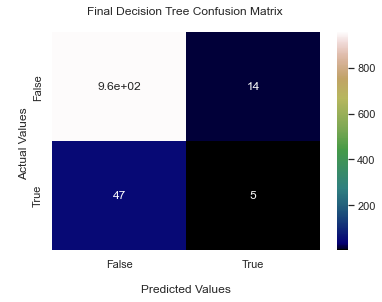

In [56]:
# lets visualize our confusion matrix 
y_pred=final_tree.predict(test_prepared)

final_cm = confusion_matrix(ytest, y_pred)
final_map = sns.heatmap(final_cm, cmap='gist_earth', annot=True)

# set axis in alph order 
final_map.set_title('Final Decision Tree Confusion Matrix \n');
final_map.set_xlabel('\nPredicted Values')
final_map.set_ylabel('\nActual Values ');

# Ticket labels - List must be in alphabetical order
final_map.xaxis.set_ticklabels(['False','True'])
final_map.yaxis.set_ticklabels(['False','True'])
 
# Display the visualization of the Confusion Matrix.
plt.show()

In [57]:
from sklearn import metrics
y_pred=final_tree.predict(test_prepared)

print('Overall accuracy: ', accuracy_score(ytest, y_pred))
print("Overall recall: ", metrics.recall_score(ytest, y_pred))
print('Overall precision: ', metrics.precision_score(ytest, y_pred))
print("Overall f1 score: ", metrics.f1_score(ytest, y_pred))

Overall accuracy:  0.9403131115459883
Overall recall:  0.09615384615384616
Overall precision:  0.2631578947368421
Overall f1 score:  0.14084507042253522
